# Data Visualization with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas

Functionalities of Seaborn:
- Dataset oriented API
- Analysing univariate and bivariate distributions.
- Automatic estimation and plotting of linear regression models
- Convinient views for complex datasets
- Colour palettes

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\roysi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
google_df = pd.read_csv(r'D:\Data Science\Natural Language Processing\Data Toolkit\Data Visualisation in Python\Data Visualisation Case Study\Case Study Notebook\googleplaystore_v2.csv')
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
google_df.shape

(10841, 13)

## Null Values and Duplicates

In [5]:
google_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

So `Rating` is the target column hence we should eliminate the column which has NULL values in Rating

In [6]:
google_df[google_df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82000.0,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7700.0,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9800.0,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9600.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [7]:
google_df = google_df[~ (google_df.Rating.isnull())]

In [8]:
# Obtaining the null value count again column-wise

google_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
google_df[google_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
google_df = google_df[~(google_df['Android Ver'].isnull())]

In [11]:
# Obtaining the null value count again column - wise

google_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [12]:
google_df[google_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [13]:
google_df = google_df[~(google_df['Current Ver'].isnull())]


In [14]:
# Checking for Duplicates in the dataset

google_df.duplicated().sum()

474

From the above script it is confirmed that there are 474 duplicate values in the dataset

In [15]:
google_df.drop_duplicates(inplace = True)

In [16]:
google_df.duplicated().sum()

0

## Data Visualization

**Distribution Plots**

A distribution plot is pretty similar to the histogram functionality in matplot. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve(or the **KDE**) that gets drawn over the distribution is the approximate probability density curve.

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density of each bin or bucket.

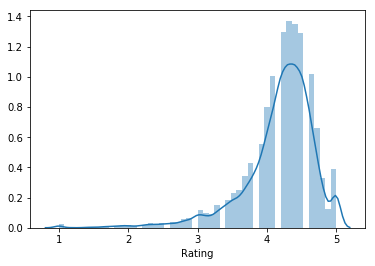

<AxesSubplot:xlabel='Rating', ylabel='Density'>

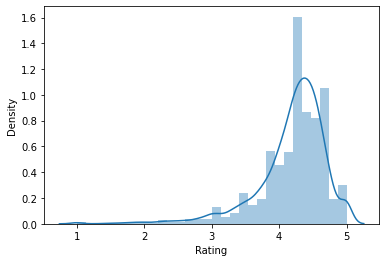

In [17]:
# Create a distribution plot for rating

sns.distplot(google_df.Rating, bins = 30)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

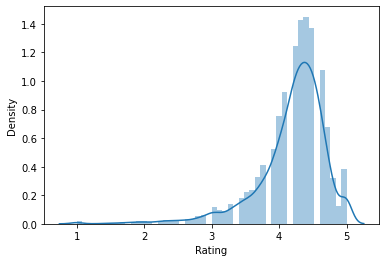

In [18]:
# Change the number of bins

sns.distplot(google_df.Rating, bins = 50)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

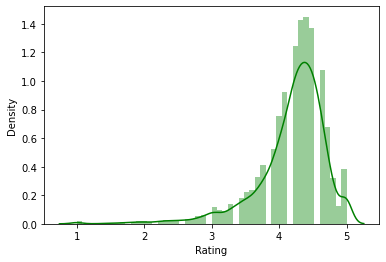

In [19]:
# Change the colour of bins to green

sns.distplot(google_df.Rating, bins = 50, color = 'green')

**Styling Options**

One of the biggest advantages of Seaborn is that you can retain its aesthetics properties and also the Matplotlib functinalities to perform additional customisations.

In [20]:
# check all the styling options

?sns.set_style

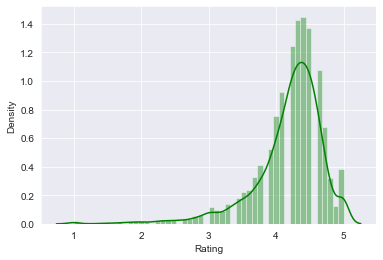

In [21]:
sns.set_style('darkgrid')
sns.distplot(google_df.Rating, bins = 50, color = 'green')
plt.show()

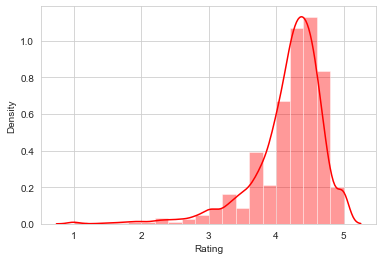

In [22]:
# Change the number of bins to 20

sns.set_style('whitegrid')
sns.distplot(google_df.Rating, bins = 20, color = 'red')

plt.show()

**Pie-Chart and Bar Chart**

For analysing how a numeric variable changes across several categories of a categorical variable we utilise either a pie chart or a box plot

For example, if we want to visualise the responses of a marketing campaign, we can use the following views:

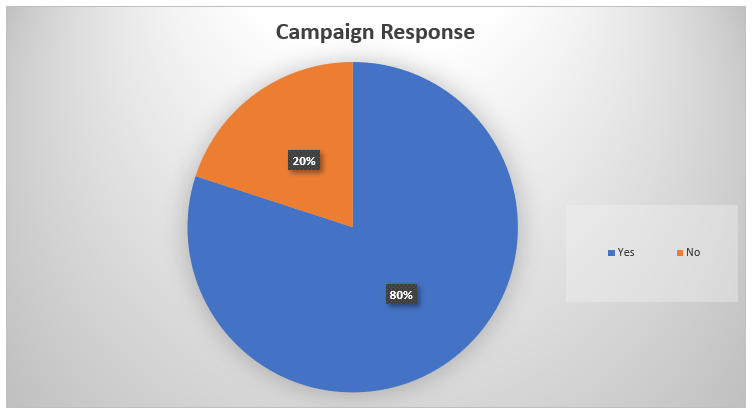


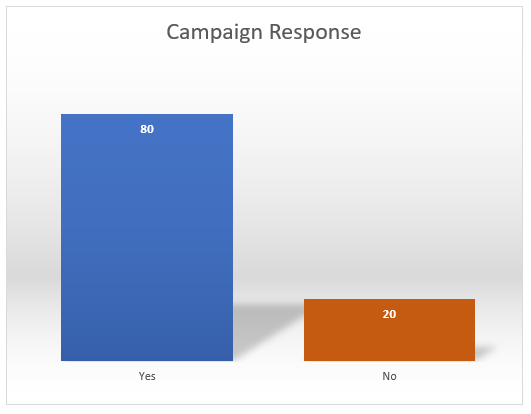

In [23]:
# Analyse the Content Rating Column

google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
google_df['Content Rating'].value_counts()

Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [25]:
# Remove the rows with values which are less represented
google_df[(google_df['Content Rating'] == 'Adults only 18+') | 
          (google_df['Content Rating'] == "Unrated")]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,"500,000+",Free,0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,"1,000,000+",Free,0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,"500,000+",Free,0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [26]:
google_df[(google_df['Content Rating'] == 'Adults only 18+') | 
          (google_df['Content Rating'] == "Unrated")]['Content Rating'] = "Everyone"

In [27]:
google_df = google_df[~((google_df['Content Rating'] == 'Adults only 18+') | 
          (google_df['Content Rating'] == "Unrated"))]

In [28]:
# Check all the apps belonging to different categories of Content Rating
google_df['Content Rating'].value_counts()

Everyone        7089
Teen            1022
Mature 17+       411
Everyone 10+     360
Name: Content Rating, dtype: int64

In [29]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
# resetting the index
google_df.reset_index(inplace = True)

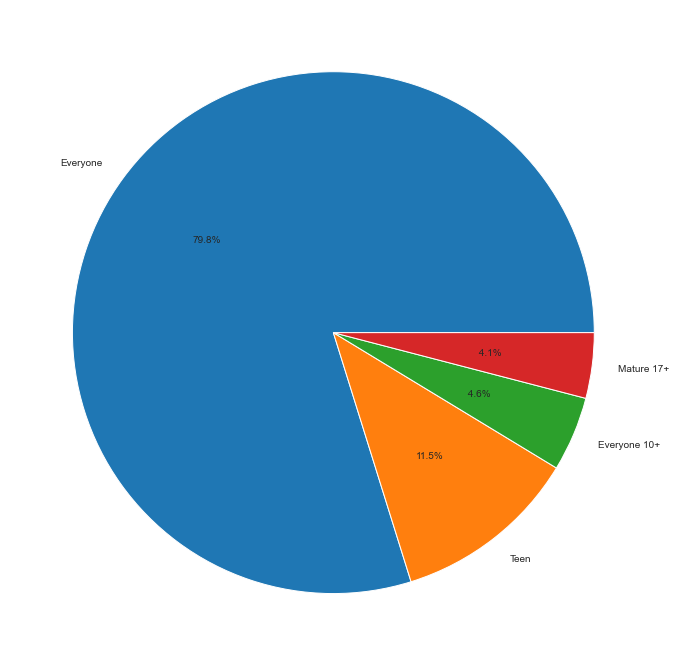

In [31]:
# plot a pie chart

plt.figure(figsize = (12, 12))
plt.pie(google_df['Content Rating'].value_counts(), 
        labels = google_df['Content Rating'].unique(),
       autopct = '%4.1f%%')

plt.show()

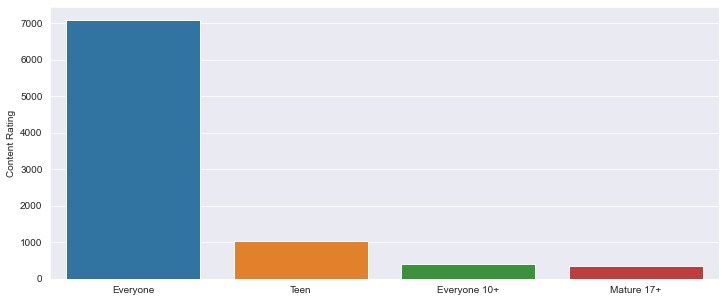

In [32]:
# plot a bar chart

plt.figure(figsize = (12, 5))
sns.set_style('darkgrid')
sns.barplot(x = google_df['Content Rating'].unique(), 
            y = google_df['Content Rating'].value_counts())

plt.show()

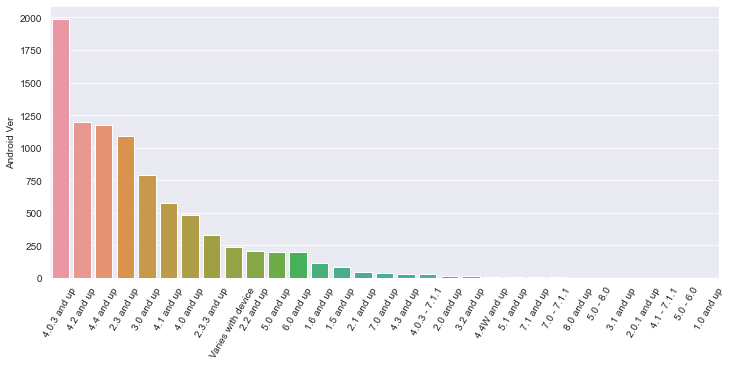

In [33]:
# Plot a bar plot for checking the 4th highest Andriod Version type

plt.figure(figsize = (12, 5))
sns.barplot(x= google_df['Android Ver'].unique(), 
            y = google_df['Android Ver'].value_counts())
plt.xticks(rotation = 60)

plt.show()

2.3 and up is the 4th highest version of the Andriod Ver column in the dataset.

In [34]:
google_df.columns

Index(['index', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

**Scatter Plots**

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualizations we can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sorts of trends in the data with the help of a scatter plot.

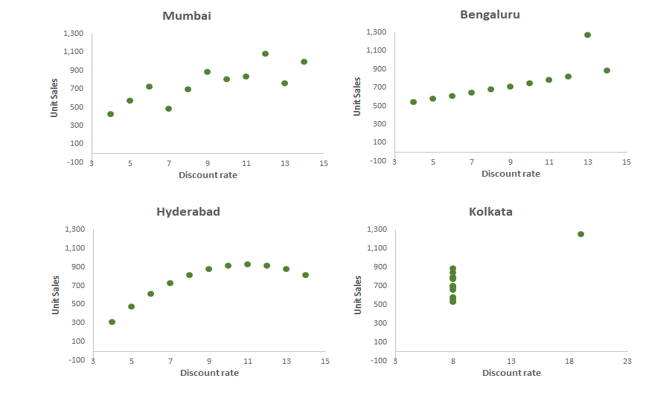

Scatter Plots are pretty useful in regression problems to check whether a linear trend exists in the data ro not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear staright line trend is visible.

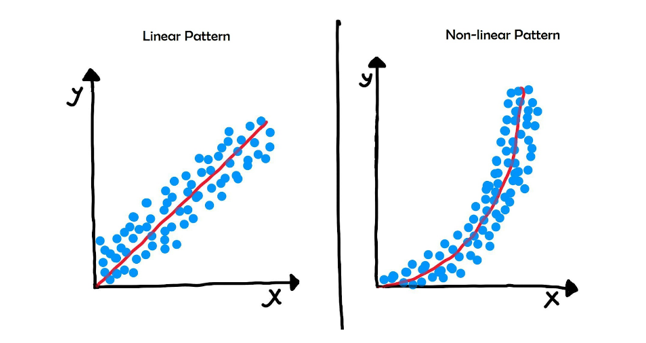

Also, scatter plots help in observing naturally occuring clusters. In the following image, the marks of students in Maths and Biology has been plotted. We can clearly group the students to 4 clusters now. CLuster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally in both the subjects and so on.

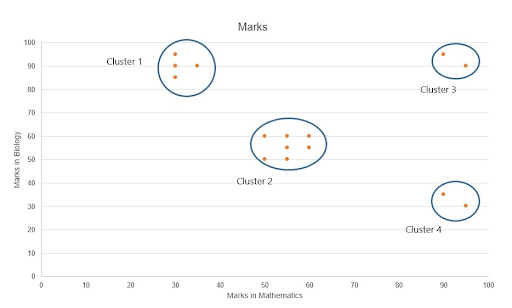


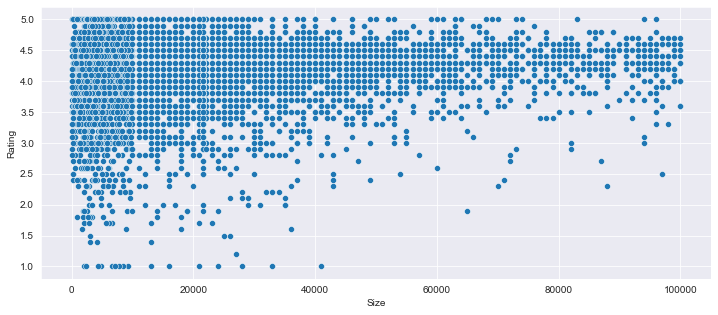

In [35]:
# Size vs Rating
# Plot a scatter plot in the matplotlib way between Size and rating

plt.figure(figsize = (12, 5))
sns.scatterplot(x = google_df.Size, y = google_df.Rating)
plt.show()

<Figure size 864x360 with 0 Axes>

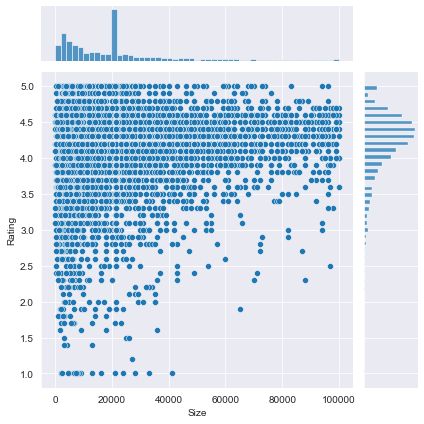

In [36]:
# Now plot Size and Rating in a jointplot

plt.figure(figsize = (12, 5))
sns.jointplot(x = google_df.Size, y = google_df.Rating )
plt.show()

**Reg Plots**
- There are an extension to the jointplots, where a regression line is added to the view.

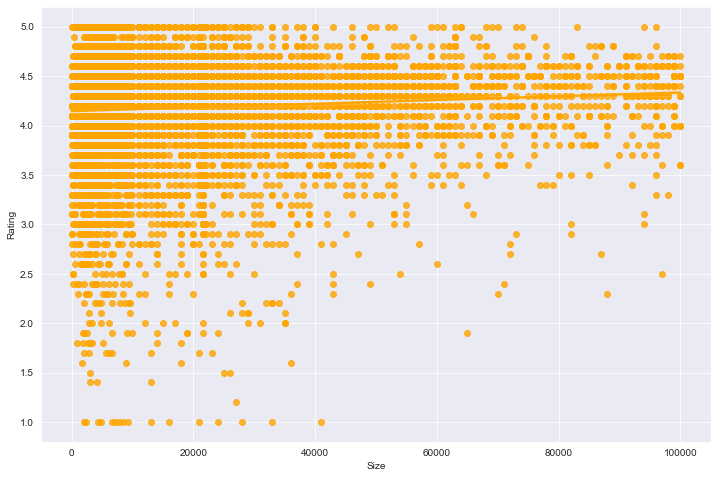

In [37]:
# Plot a reg plot for Price and Rating and observe the trend

plt.figure(figsize = (12, 8))
sns.regplot(x = google_df.Size, y = google_df.Rating, color = 'orange')
plt.show()

In [38]:
google_df.Price[google_df['Type'] == 'Paid']

221      $4.99
222      $4.99
376      $3.99
415      $3.99
416      $6.99
         ...  
8781     $0.99
8783     $0.99
8828     $7.99
8841    $16.99
8844     $1.20
Name: Price, Length: 611, dtype: object

In [39]:
google_df.Price.str.replace({'$': ''}, inplace = True)


TypeError: replace() got an unexpected keyword argument 'inplace'

In [40]:
google_df.Price = google_df.Price.str.replace('$', '')

In [41]:
google_df[google_df.Price == '$4.99']

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [42]:
google_df.Price

0       0
1       0
2       0
3       0
4       0
       ..
8877    0
8878    0
8879    0
8880    0
8881    0
Name: Price, Length: 8882, dtype: object

In [43]:
google_df.Price = google_df.Price.astype(float)

<AxesSubplot:xlabel='Price', ylabel='Rating'>

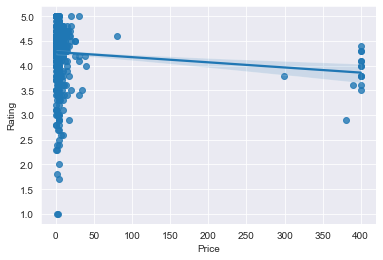

In [44]:
# Plot a reg plot for Price and Rating again only for paid apps.
sns.regplot(x = google_df.Price[google_df['Type'] == 'Paid'], 
 y = google_df.Rating[google_df['Type'] == 'Paid'])


**Pair Plots**
- When you have several numneric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix.
- For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables.
- For the diagonal views, it plots a **histogram**.

Pair plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For exampole, say we want to predict how my compant's profits are affected by three different factors. In order to choose which we created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that we obtained from the pair plot.

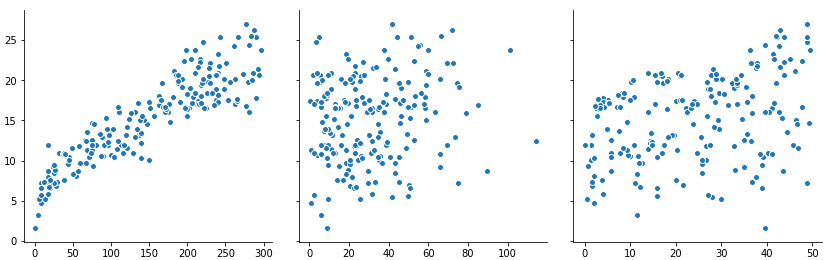

It is clearly visible that the left-most factor is the most prominently related to the profits, given how lienar scattered the points are and how scattered the rest two factors are.



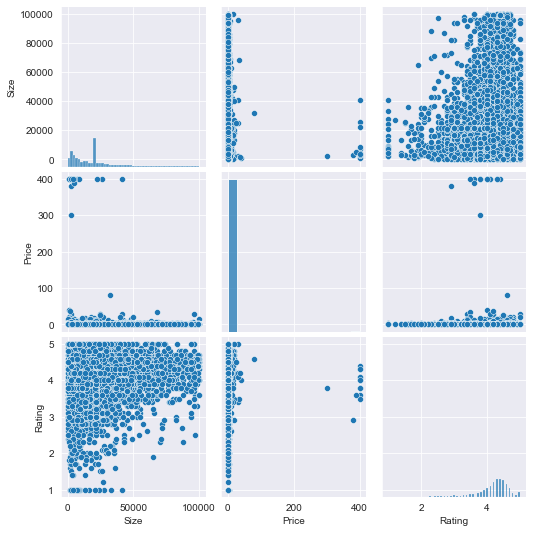

In [45]:
# Create a pair plots for Reviews, Size, Price and Rating

sns.pairplot(google_df[['Reviews', 'Size', "Price", 'Rating']])
plt.show()

**Bar Charts Revisited**

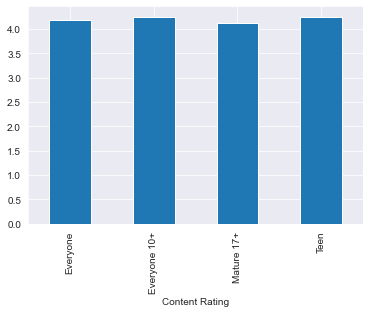

In [46]:
# Plot a bar plot of Content Rating vs Average rating

google_df.groupby(['Content Rating']).Rating.mean().plot.bar()

plt.show()

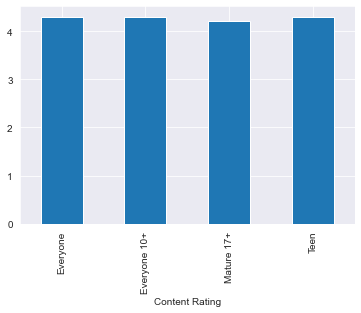

In [47]:
# Plot the bar plot again with Median Rating

google_df.groupby(['Content Rating']).Rating.median().plot.bar()
plt.show()

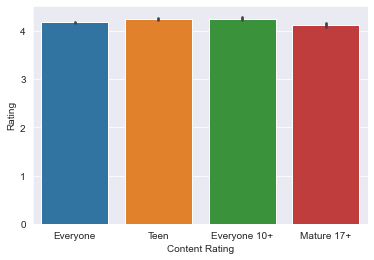

In [48]:
# plot the above bar plot using the estimator parameter

sns.barplot(x = google_df['Content Rating'], y = google_df['Rating'], estimator = np.mean)

plt.show()


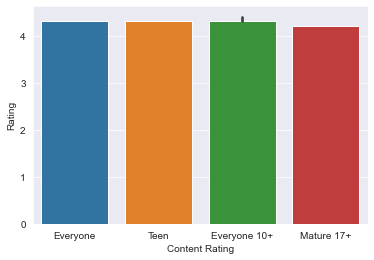

In [49]:
sns.barplot(x = google_df['Content Rating'], y = google_df['Rating'], estimator = np.median)

plt.show()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

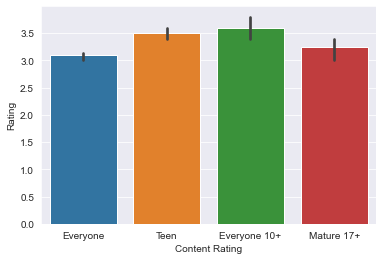

In [50]:
# Plot the bar plot with only the 5th percentile of Ratings

sns.barplot(x = google_df['Content Rating'], 
            y = google_df['Rating'], 
            estimator = lambda x: np.quantile(x, 0.05))

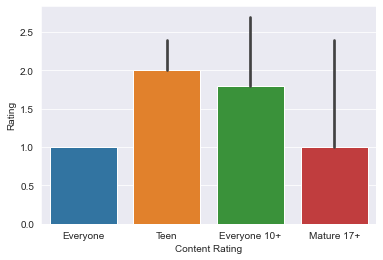

In [51]:
# Plot the bar plot with the minimum Rating

sns.barplot(x = google_df['Content Rating'], y = google_df['Rating'], estimator = np.min)

plt.show()

**Box Plots Revisted**

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories.

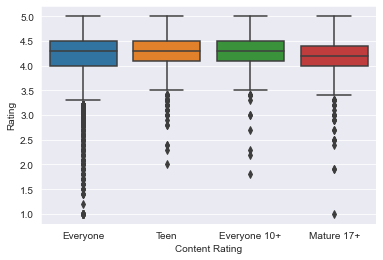

In [52]:
# PLot a box plot of Rating vs Content Rating

sns.boxplot(x = google_df['Content Rating'], y = google_df['Rating'])

plt.show()

<AxesSubplot:ylabel='Rating'>

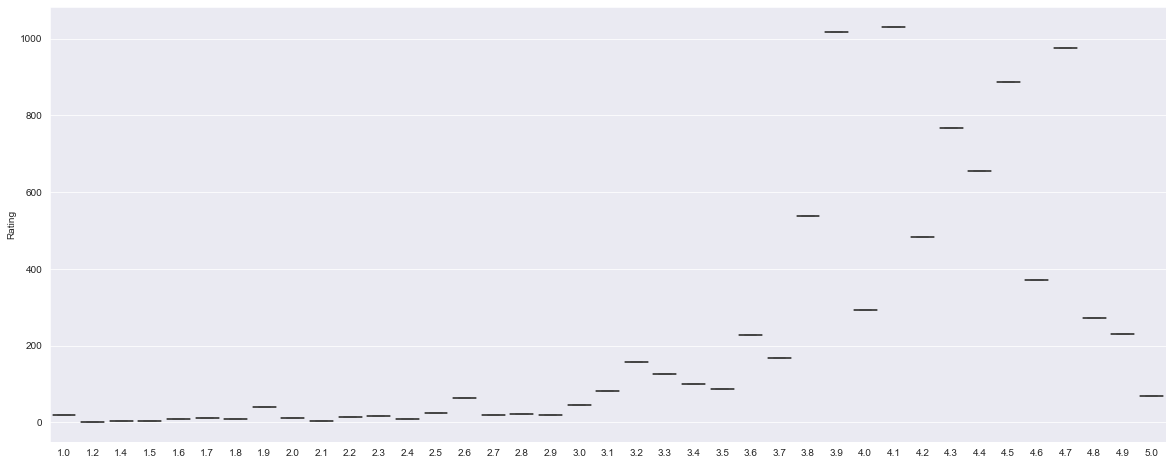

In [53]:
# Plot a box plot for the Rating column only
plt.figure(figsize = (20, 8
                     ))
sns.boxplot(x = google_df['Rating'].unique(), y = google_df['Rating'].value_counts())

In [54]:
# Plot a box plot of Ratings across the 4 most popular genres

google_df.Genres.value_counts()

Tools                          731
Entertainment                  498
Education                      446
Action                         349
Productivity                   334
                              ... 
Casual;Music & Video             1
Board;Pretend Play               1
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Strategy;Creativity              1
Name: Genres, Length: 115, dtype: int64

In [55]:
genres = ['Tools', 'Entertainment', 'Education', 'Action']

In [56]:
genres

['Tools', 'Entertainment', 'Education', 'Action']

In [57]:
c = ['Tools','Entertainment','Medical','Education']
inp5= google_df[google_df['Genres'].isin(c)]

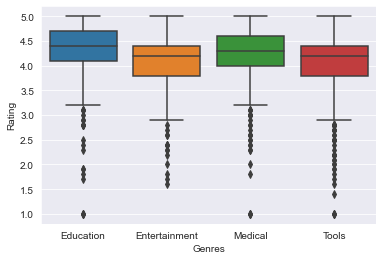

In [58]:
sns.boxplot(x =inp5['Genres'],
           y = google_df.Rating)

plt.show()

**Heat Maps**

Heat map utilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the player's areas of strenght and weakness.

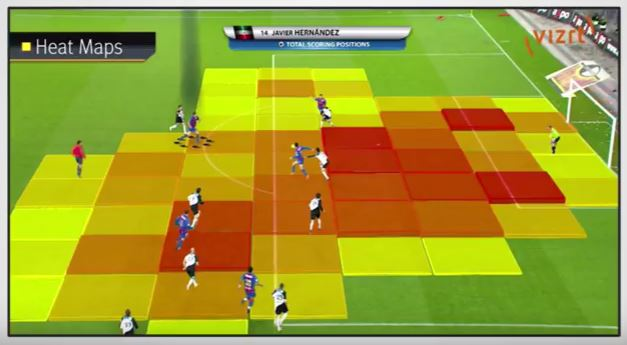

- In python, you can create a heatmap whenever you have a rectangular grid or table of numbers analysing any two features

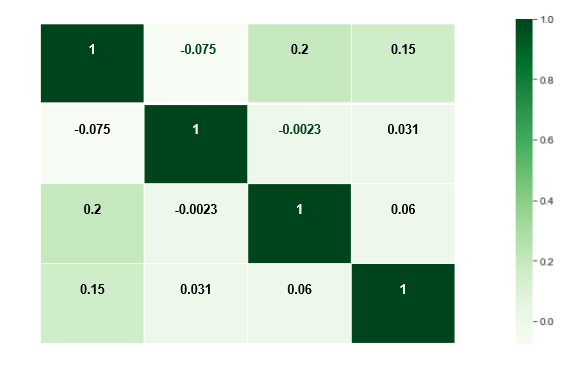

- You'll be using sns.heatmap()

In [59]:
# Ratings vs Size vs Content Rating

# Prepare buckets for the Size COlumn using pd.cut

google_df.Size.describe()

count      8882.000000
mean      22557.112960
std       21422.915444
min           8.500000
25%        6300.000000
50%       20000.000000
75%       27000.000000
max      100000.000000
Name: Size, dtype: float64

<AxesSubplot:xlabel='Size'>

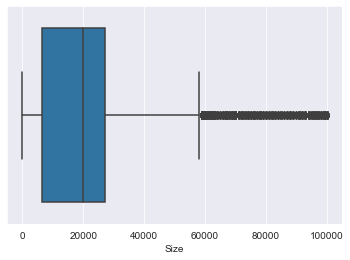

In [60]:
sns.boxplot(google_df.Size)

In [63]:
google_df['Bucket'] = pd.qcut(google_df.Size, 
                         [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
                         ['VVVL', 'VVL', 'VL', 'L', 'QM', 'M', 'H', 'QH', 'VH', 'QVH'])

In [64]:
google_df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Bucket
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,QM
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,QM
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,QH
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VVVL


In [66]:
google_df.drop(columns = 'index', inplace = True)

In [71]:
# Create a pivot table for Buckets and Content Rating with values set to Rating

pd.pivot_table(data = google_df, index = 'Content Rating',
                      columns = 'Bucket', values = "Rating")

Bucket,VVVL,VVL,VL,L,QM,M,H,QH,VH,QVH
Content Rating,,,,,,,,,,
Everyone,4.053693,4.170000,4.158161,4.169647,4.190294,4.271581,4.191156,4.157808,4.174404,4.262157
Everyone 10+,4.050000,4.242857,4.116667,4.294444,4.276667,4.229412,4.250000,4.227083,4.124138,4.379787
Mature 17+,3.741176,4.269231,3.989744,4.146154,3.827500,4.221591,4.162500,4.181633,4.154348,4.247826
Teen,4.205263,4.206061,4.257812,4.255814,4.133019,4.246535,4.350000,4.203774,4.231915,4.305236


In [72]:
# Change the agreegation to median

pd.pivot_table(data = google_df, index = 'Content Rating',
                      columns = 'Bucket', values = "Rating",
               aggfunc = np.median)

Bucket,VVVL,VVL,VL,L,QM,M,H,QH,VH,QVH
Content Rating,,,,,,,,,,
Everyone,4.2,4.30,4.30,4.3,4.3,4.3,4.30,4.3,4.3,4.4
Everyone 10+,4.1,4.25,4.25,4.4,4.3,4.3,4.30,4.3,4.2,4.4
Mature 17+,3.6,4.40,4.20,4.3,4.0,4.2,4.10,4.2,4.2,4.2
Teen,4.2,4.30,4.30,4.3,4.2,4.3,4.35,4.3,4.3,4.3


In [76]:
# Change the aggregation to 20th percentile

pd.pivot_table(data = google_df, index = 'Content Rating',
                      columns = 'Bucket', values = "Rating",
               aggfunc = lambda x : np.quantile(x, 0.2))

Bucket,VVVL,VVL,VL,L,QM,M,H,QH,VH,QVH
Content Rating,,,,,,,,,,
Everyone,3.70,3.90,3.82,3.80,3.90,4.10,3.8,3.8,3.9,4.0
Everyone 10+,3.90,3.86,3.72,4.14,4.18,4.00,4.0,4.0,3.9,4.2
Mature 17+,3.04,3.70,3.50,3.90,3.48,4.04,3.9,3.9,4.0,4.0
Teen,3.90,3.80,4.00,3.90,3.90,4.00,4.2,4.0,4.0,4.1


In [89]:
# Store the pivot table in a seperate variable

p_table = pd.pivot_table(data = google_df, index = 'Content Rating',
                      columns = 'Bucket', values = "Rating",
               aggfunc = lambda x : np.quantile(x, 0.2))

In [91]:
p_table

Bucket,VVVL,VVL,VL,L,QM,M,H,QH,VH,QVH
Content Rating,,,,,,,,,,
Everyone,3.70,3.90,3.82,3.80,3.90,4.10,3.8,3.8,3.9,4.0
Everyone 10+,3.90,3.86,3.72,4.14,4.18,4.00,4.0,4.0,3.9,4.2
Mature 17+,3.04,3.70,3.50,3.90,3.48,4.04,3.9,3.9,4.0,4.0
Teen,3.90,3.80,4.00,3.90,3.90,4.00,4.2,4.0,4.0,4.1


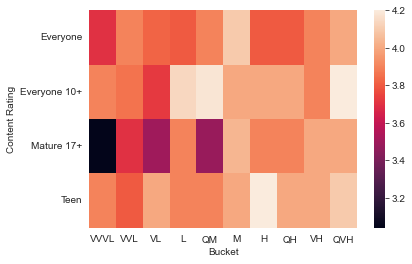

In [92]:
# Plot a heatmap

sns.heatmap(p_table)

plt.show()

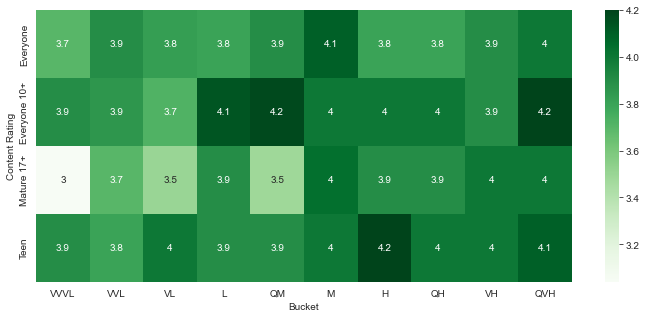

In [96]:
# Apply customisations

plt.figure(figsize = (12, 5))
sns.heatmap(p_table, cmap = 'Greens', annot = True)
plt.show()

In [97]:
# Replace Content Rating with Review_buckets in the above heat map
# Keep the aggregation at minimum values for Rating

google_df.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size               float64
Installs            object
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Bucket            category
dtype: object

In [102]:
google_df.rename(columns =  {'Bucket': 'Size_Buckets'}, inplace = True)

In [103]:
google_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_Buckets'],
      dtype='object')

In [104]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,QM
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,QM
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,QH
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VVVL


In [109]:
google_df.Reviews = google_df.Reviews.astype(int)

In [110]:
google_df.Reviews.isnull().sum()

0

<AxesSubplot:xlabel='Reviews'>

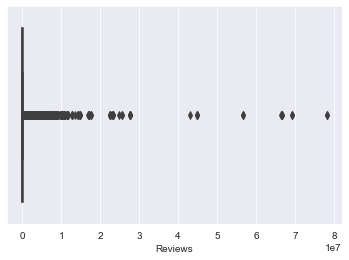

In [111]:
sns.boxplot(google_df.Reviews)

In [112]:
google_df.Reviews.describe()

count    8.882000e+03
mean     4.732966e+05
std      2.906645e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.720500e+03
75%      7.139625e+04
max      7.815831e+07
Name: Reviews, dtype: float64

**Obtaining even quantiles of the Reviews column**

In [114]:
np.quantile(google_df.Reviews, 0.2)

82.0

In [115]:
np.quantile(google_df.Reviews, 0.4)

1311.0

In [116]:
np.quantile(google_df.Reviews, 0.6)

16121.79999999999

In [117]:
np.quantile(google_df.Reviews, 0.8)

131460.8000000001

In [118]:
np.quantile(google_df.Reviews, 1)

78158306

In [123]:
pd.qcut(google_df.Reviews, 
       [0, 0.2, 0.4, 0.6, 0.8, 1],
       ['VL', 'L', 'M','H', 'VH'])

0        L
1        L
2        H
3       VH
4        L
        ..
8877    VL
8878    VL
8879    VL
8880     L
8881    VH
Name: Reviews, Length: 8882, dtype: category
Categories (5, object): ['VL' < 'L' < 'M' < 'H' < 'VH']

In [129]:
google_df['Review_Buckets'] = pd.qcut(google_df.Reviews, 
       [0, 0.2, 0.4, 0.6, 0.8, 1],
       ['VL', 'L', 'M','H', 'VH'])

In [132]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Buckets,Review_Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,QM,L
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,QM,L
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,H
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,QH,VH
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VVVL,L


In [134]:
pd.pivot_table(data = google_df, index = 'Content Rating', 
              columns = 'Review_Buckets', values = 'Rating')

Review_Buckets,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.086507,4.031234,4.172585,4.275642,4.396523
Everyone 10+,3.973913,4.034043,4.232836,4.222917,4.421260
Mature 17+,4.103922,3.952857,4.044643,4.202817,4.277570
Teen,4.293388,4.071970,4.151064,4.189837,4.370149


In [135]:
pd.pivot_table(data = google_df, index = 'Content Rating', 
              columns = 'Review_Buckets', values = 'Rating', 
              aggfunc = np.min)

Review_Buckets,VL,L,M,H,VH
Content Rating,,,,,
Everyone,1.0,1.6,1.8,2.8,3.3
Everyone 10+,1.8,2.2,3.4,3.5,3.8
Mature 17+,1.0,1.9,2.5,3.1,3.6
Teen,2.0,2.3,3.0,2.9,3.3


In [136]:
p_table_2 = pd.pivot_table(data = google_df, index = 'Content Rating', 
              columns = 'Review_Buckets', values = 'Rating', 
              aggfunc = np.min)

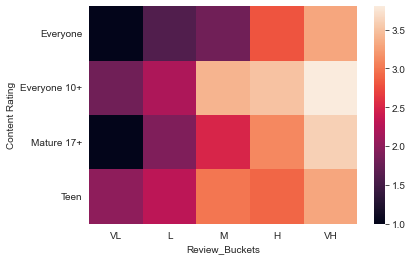

In [138]:
sns.heatmap(p_table_2)

plt.show()

# Additional Visualisations

**Line Plots**
- A line plot tries to observe trends using time dependent data.

In [139]:
# Extract the month from the last Updated Date

google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Buckets,Review_Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,QM,L
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,QM,L
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,H
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,QH,VH
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VVVL,L


In [140]:
google_df['Last Updated']

0        January 7, 2018
1       January 15, 2018
2         August 1, 2018
3           June 8, 2018
4          June 20, 2018
              ...       
8877       June 18, 2017
8878       July 25, 2017
8879        July 6, 2018
8880    January 19, 2015
8881       July 25, 2018
Name: Last Updated, Length: 8882, dtype: object

In [142]:
google_df['Last Updated'] = pd.DatetimeIndex(google_df['Last Updated'])

In [143]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Buckets,Review_Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,QM,L
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,QM,L
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,L,H
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,QH,VH
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,VVVL,L


In [150]:
google_df['Last_updated_month'] = pd.Series(google_df['Last Updated']).dt.month

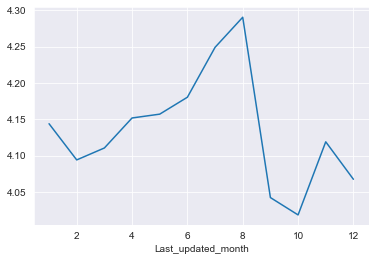

In [152]:
# Find the average Rating across all the months

google_df.groupby(['Last_updated_month'])['Rating'].mean().plot()

plt.show()

**Stacked Bar Charts**

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category.

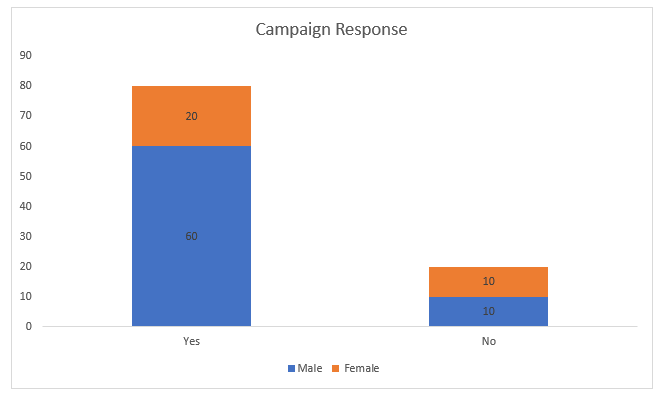

In [156]:
google_df.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [164]:
google_df.Installs = google_df.Installs.str.replace('+','')

In [167]:
google_df.Installs = google_df.Installs.str.replace(',','')

In [170]:
google_df.Installs = google_df.Installs.astype(int)

In [171]:
# Create a pivot table for Content Rating and updated Month with the values set to Installs

pd.pivot_table(data = google_df, values = 'Installs', index = 'Last_updated_month', columns = 'Content Rating', aggfunc = sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Last_updated_month,,,,
1,1021876390,75282000,9601210,44159010
2,937362006,14321000,13021500,39597710
3,985660531,30322510,9111100,89850310
4,2347991280,23300000,5259000,251619410
5,5341390800,128173500,110140100,560689600
6,4732935505,1366727100,124652100,505216600
7,42915616485,8271556000,1679154710,14085056810
8,38656222321,1164721000,2320331700,15132805650
9,380140410,24921100,2201010,22483100


In [172]:
# Store the table in a seperate variable

p_table_3 = pd.pivot_table(data = google_df, values = 'Installs', index = 'Last_updated_month', columns = 'Content Rating', aggfunc = sum)

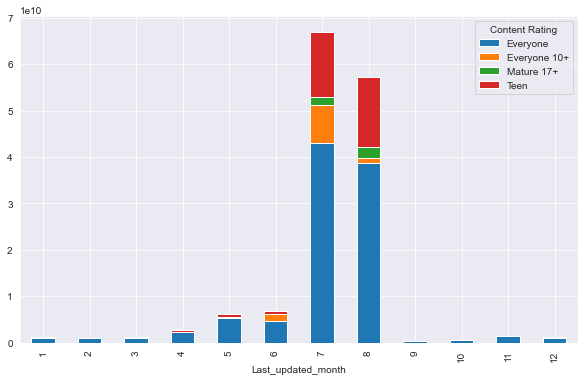

In [173]:
# plot a stacked bar chart

p_table_3.plot(kind = 'bar', stacked = 'True', figsize = [10, 6])
plt.show()

In [175]:
##Plot the stacked bar chart again wrt to the proportions.
p_table_3_per = p_table_3[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)

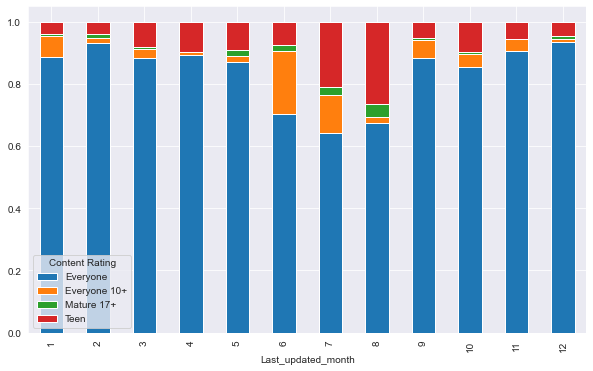

In [177]:
p_table_3_per.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()